In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = '../../../../../../dataframes/enigh/CONCENTRADOHOGAR/mixed/df_09_clean.csv'


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

tam_loc,est_socio,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,⋯,cuota_viv,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog
1,2,3,1,40,8,4,1,3,3,⋯,0,0,0,0,0,0,0,0,0,0
1,2,1,1,83,8,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
1,2,2,2,44,8,3,2,1,2,⋯,0,0,0,0,0,0,0,0,0,0
1,2,1,1,48,10,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
1,2,1,1,75,10,1,1,0,1,⋯,0,0,0,0,0,0,0,10327,0,0
1,2,3,1,60,4,8,2,6,7,⋯,0,929,929,0,0,0,0,0,1076,0


In [4]:
data$huespedes <- NULL

In [5]:
ncol(data)

[1] 117

In [6]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [7]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
tam_loc,0.2054088
est_socio,1.0104823
clase_hog,1.0209569
sexo_jefe,0.6435964
edad_jefe,4.1157145
educa_jefe,2.0518012


In [8]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
17,ing_cor,7.436011
49,gasto_mon,7.435709
84,transporte,7.215884
71,vivienda,7.166427
50,alimentos,7.153190
96,personales,7.066486


Saving 7 x 7 in image


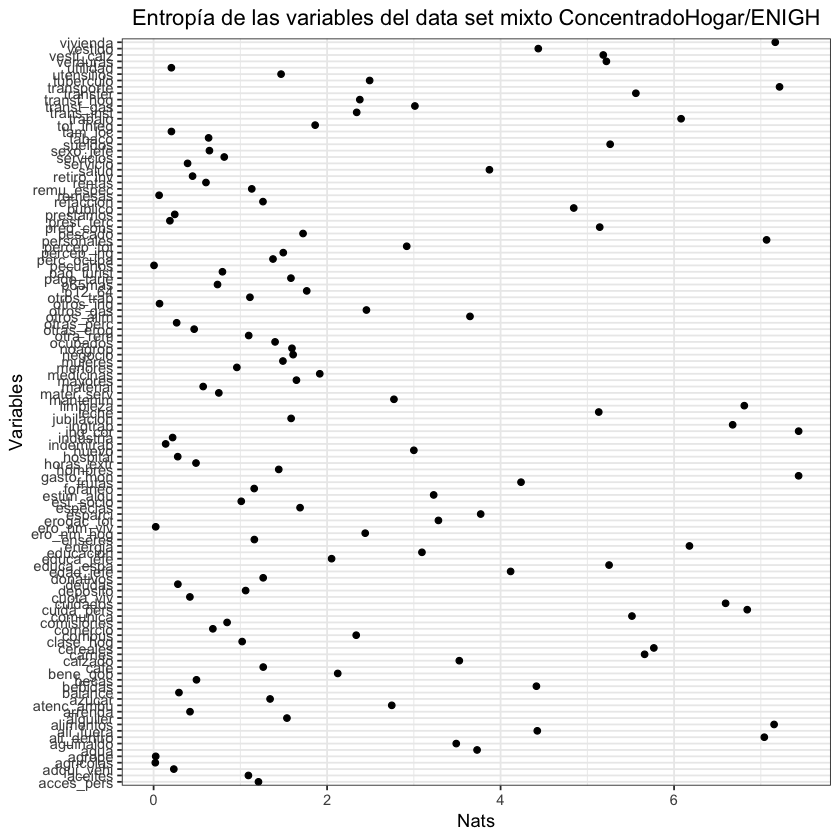

In [20]:
ggplot(df_entropy, aes(y=data_names, x=data_entropy)) + 
    theme_bw() +
    ggtitle('Entropía de las variables del data set mixto ConcentradoHogar/ENIGH') + 
    xlab('Nats') +
    ylab("Variables")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/CONCENTRADOHOGAR/entropy_og.png", dpi = 300)


Saving 7 x 7 in image


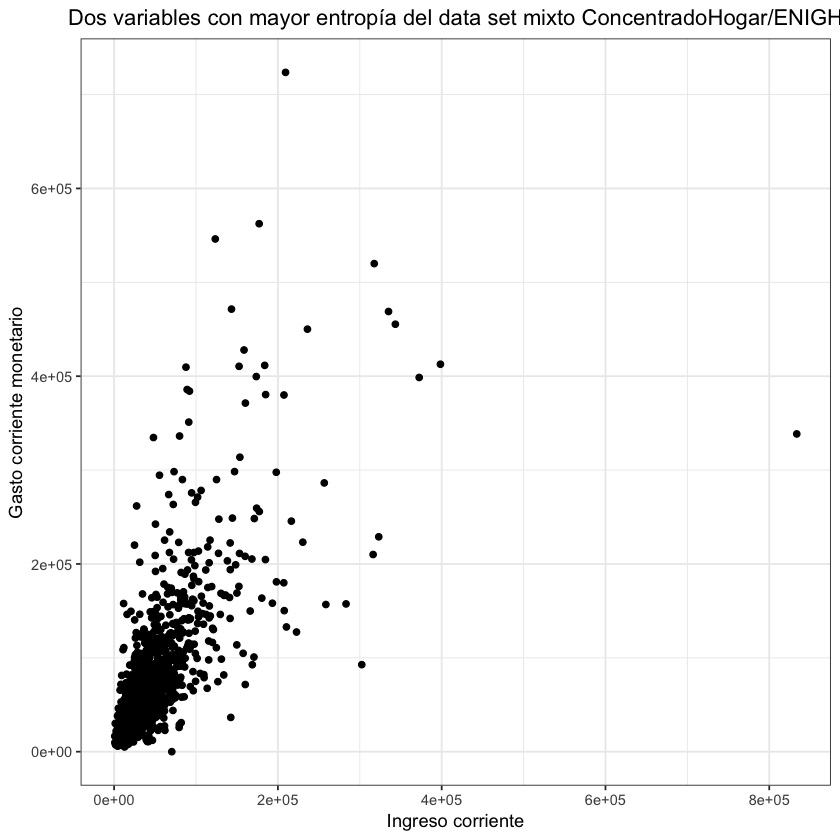

In [21]:
ggplot(data = data, 
       aes(y=data$ing_cor, 
           x=data$gasto_mon))+
    theme_bw() +
    ggtitle('Dos variables con mayor entropía del data set mixto ConcentradoHogar/ENIGH') + 
    xlab('Ingreso corriente') +
    ylab("Gasto corriente monetario")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/CONCENTRADOHOGAR/entropy_og_2_var.png", dpi = 300)


In [22]:
png("../../../../../../images/enigh/CONCENTRADOHOGAR/entropy_og_3_var.png")
scatterplot3d(y=data$ing_cor, 
              x=data$gasto_mon,
              z=data$transporte, pch = 19, 
              color = "black", 
              main="Tres variables con mayor entropía del data set mixto ConcentradoHogar/ENIGH",
              xlab = 'Ingreso corriente', 
              ylab = 'Gasto corriente monetario',
              zlab = 'Gasto en transporte') 
dev.off()

pdf 
  2

In [16]:
file = '../../../../../../dataframes/enigh/CONCENTRADOHOGAR/df_entropy_og_mixed.csv'

In [17]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
